# Cadence

A rhythm analysis toolkit, gathering multiple parsing engines:
* [Prosodic](https://github.com/quadrismegistus/prosodic) for fast English and Finnish metrical scansion.
* Cadence itself for slower but exhaustive, MaxEnt-able metrical scansion.

## Quickstart

### Install

#### 1. Install python package
```
# install from pypi
pip install -U cadences    # "cadence" was taken :-/

# or from github very latest
pip install -U git+https://github.com/quadrismegistus/cadence
```

#### 2. Insteall espeak (TTS)

Install espeak, free TTS software, to 'sound out' unknown words. See [here](http://espeak.sourceforge.net/download.html) for all downloads. For Mac or Linux, you can use:
```
apt-get install espeak     # linux
brew install espeak        # mac
```
If you're on mac and don't have brew installed, do so [here](https://brew.sh/).

In [1]:
# this should work following installation
import cadence as cd

### Load texts

In [2]:
sonnetXIV = """
How can I then return in happy plight,
That am debarred the benefit of rest?
When day‚Äôs oppression is not eased by night,
But day by night and night by day oppressed,
And each, though enemies to either‚Äôs reign,
Do in consent shake hands to torture me,
The one by toil, the other to complain
How far I toil, still farther off from thee.
I tell the day, to please him thou art bright,
And dost him grace when clouds do blot the heaven:
So flatter I the swart-complexiond night,
When sparkling stars twire not thou gildst the even.
But day doth daily draw my sorrows longer,
And night doth nightly make grief‚Äôs length seem stronger.
"""

In [3]:
# These are identical
sonnet = cd.Verse(sonnetXIV)
sonnet = cd.Text(sonnetXIV, linebreaks=True, phrasebreaks=False)

In [4]:
# Tokenize
sonnet.words()

word_ispunc
para_i sent_i sentpart_i line_i word_i word_str              
1      1      1          1      1      How                  0
                                2       can                 0
                                3       I                   0
                                4       then                0
                                5       return              0
...                                                       ...
       4      17         14     15      grief's             0
                                16      length              0
                                17      seem                0
                                18      stronger            0
                                19     .                    1

[135 rows x 1 columns]

In [5]:
# Syllabify
sonnet.sylls()

prom_strength  ...  word_nsyll
para_i sent_i sentpart_i line_i word_i word_str  word_tok word_ipa_i word_ipa   syll_i syll_str syll_ipa syll_stress syll_weight                 ...            
1      1      1          1      1      How       how      1          ha ä        1      How      ha ä      U           H                      NaN  ...           1
                                2       can      can      1          k√¶n        1      can      k√¶n      U           H                      NaN  ...           1
                                3       I        i        1          'a…™        1      I        'a…™      P           H                      1.0  ...           1
                                                          2          a…™         1      I        a…™       U           H                      0.0  ...           1
                                4       then     then     1          '√∞…õn       1      then     '√∞…õn     P           H                      1.0  ...           1
...                                                                                                                                         ...  ...         ...
       4      17         14     16      length   length   1          'l…õ≈ãkŒ∏     1      length   'l…õ≈ãkŒ∏   P           H                      NaN  ...           1
                                17      seem     seem     1          'siÀêm      1      seem     'siÀêm    P           H                      NaN  ...           1
                                18      stronger stronger 1          'str…îÀê≈ã.…õÀê 1      stron    'str…îÀê≈ã  P           H                      1.0  ...           2
                                                                                2      ger      …õÀê       U           L                      0.0  ...           2
                                19     .                  0                     0      .                 NaN         NaN                    NaN  ...           0

[186 rows x 6 columns]

In [6]:
# Syntax-parse
sonnet.syntax()

dep_head  dep_type  ... pos_xpos word_depth
para_i sent_i word_i word_str                      ...                    
1      1      1      How              5    advmod  ...      WRB          4
              2      can              5       aux  ...       MD          4
              3      I                5     nsubj  ...      PRP          5
              4      then             5    advmod  ...       RB          5
              5      return           0      root  ...       VB          5
...                                 ...       ...  ...      ...        ...
       4      15     grief's         16  compound  ...      NNS          8
              16     length          14       obj  ...       NN          8
              17     seem            14     xcomp  ...       VB         10
              18     stronger        17     xcomp  ...      JJR         12
              19     .                5     punct  ...        .          3

[135 rows x 18 columns]

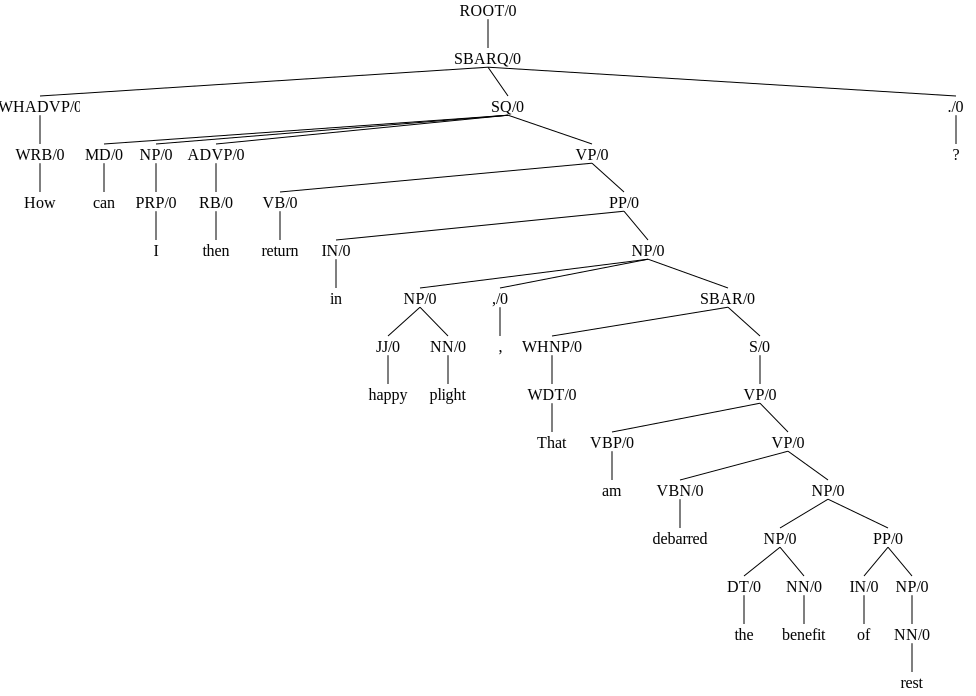

In [7]:
# Show sentences
sentence = sonnet.sent(1)
sentence.mtree()

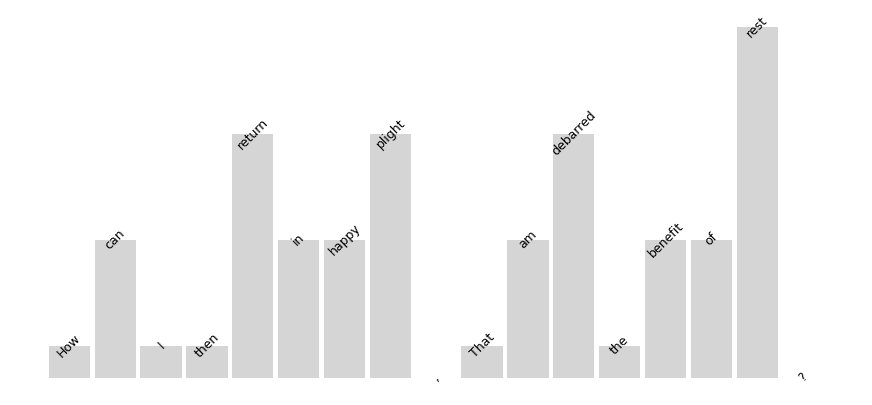

<ggplot: (742276690)>

In [8]:
# Stress grid of sentence inferred from syntactic tree
# using metricaltree
sentence.grid()

### Parse text

In [9]:
# Parse lines (verse)
sonnet.parse()

Metrically parsing line units:   0%|          | 0/14 [00:00<?, ?it/s]

 How can <u><b>I</b></u> <font style="color:darkred"><u><b>then</b></u></font> re<u><b>turn</b></u> in <u><b>hap</b></u>py <u><b>plight</b></u>,

 That <font style="color:darkred"><u>am</u></font> de<u><b>barred</b></u> the <u><b>be</b></u>ne<font style="color:darkred"><u>fit</u></font> of <u><b>rest</b></u>?

 When <u><b>day's</b></u> op<u><b>pres</b></u>sion <u><b>is</b></u> not <u><b>eased</b></u> by <u><b>night</b></u>,

 But <u><b>day</b></u> by <u><b>night</b></u> and <u><b>night</b></u> by <u><b>day</b></u> op<u><b>pressed</b></u>,

 And <u><b>each</b></u>, though <u><b>e</b></u>ne<font style="color:darkred"><u>mies</u></font> to <u><b>eit</b></u>her's <u><b>reign</b></u>,

 Do <u><b>in</b></u> con<u><b>sent</b></u> <font style="color:darkred"><b>shake</b></font> <u><b>hands</b></u> to <u><b>tor</b></u>ture <font style="color:darkred"><u>me</u></font>,

 The <font style="color:darkred"><u>one</u></font> by <u><b>toil</b></u>, the <u><b>ot</b></u>her <font style="color:darkred"><u>to</u></font> com<u><b>plain</b></u>

 How <u><b>far</b></u> I <u><b>toil</b></u>, <font style="color:darkred"><b>still</b></font> <u><b>fart</b></u>her <font style="color:darkred"><u>off</u></font> from thee.

 I <u><b>tell</b></u> the <u><b>day</b></u>, to <u><b>please</b></u> him thou <u><b>art</b></u> <font style="color:darkred"><b>bright</b></font>,

 And <u><b>dost</b></u> him <u><b>grace</b></u> when <u><b>clouds</b></u> do <u><b>blot</b></u> the <u><b>heaven</b></u>:

 So <u><b>flat</b></u>ter <u><b>I</b></u> the <u><b>swart</b></u>- com<u><b>ple</b></u>xiond <u><b>night</b></u>,

 When <u><b>spar</b></u>kling <u><b>stars</b></u> <font style="color:darkred"><u><b>twi</b></u></font>re <u><b>not</b></u> thou <u><b>gildst</b></u> the <u><b>e</b></u>ven.

 But <u><b>day</b></u> doth <u><b>dai</b></u>ly <u><b>draw</b></u> my <u><b>sor</b></u>rows <u><b>lon</b></u>ger,

 And <u><b>night</b></u> doth <u><b>nigh</b></u>tly <u><b>make</b></u> <font style="color:darkred"><b>grief's</b></font> <u><b>length</b></u> <font style="color:darkred"><b>seem</b></font> <u><b>stron</b></u>ger.

*total  ...  word_nsyll
para_i unit_i parse_rank is_troch parse_i parse       parse_str                                          sent_i sentpart_i line_i combo_i slot_i slot_meter syll_str_parse word_i word_str  word_tok word_ipa_i word_ipa   syll_i syll_str syll_ipa syll_stress syll_weight          ...            
1      1      1          0        1       wwSSwSwSwS  ùñßùóàùóê ùñºùñ∫ùóá ùóú ùô©ùôùùôöùô£ ùóãùñæùòÅùòÇùóøùóª ùóÇùóá ùóµùóÆùóΩùóâùóí ùóΩùóπùó∂ùó¥ùóµùòÅ,             1      1          1      1       1      w          ùñßùóàùóê            1      How       how      1          ha ä        1      How      ha ä      U           H               0.0  ...           1
                                                                                                                                          2      w          ùñºùñ∫ùóá            2       can      can      1          k√¶n        1      can      k√¶n      U           H               0.0  ...           1
                                                                                                                                          3      s          ùóú              3       I        i        1          'a…™        1      I        'a…™      P           H               0.0  ...           1
                                                                                                                                          4      s          ùô©ùôùùôöùô£           4       then     then     1          '√∞…õn       1      then     '√∞…õn     P           H               1.0  ...           1
                                                                                                                                          5      w          ùóãùñæ             5       return   return   1          r…™.'t…õÀên   1      re       r…™       U           L               0.0  ...           2
...                                                                                                                                                                                                                                                                             ...  ...         ...
       14     2          0        1       wSwSwSSwSSw ùñ†ùóáùñΩ ùóªùó∂ùó¥ùóµùòÅ ùñΩùóàùóçùóÅ ùóªùó∂ùó¥ùóµùóçùóÖùóí ùó∫ùóÆùó∏ùó≤ ùôúùôßùôûùôöùôõ'ùô® ùò≠ùò¶ùòØùò®ùòµùò© ùòÄùó≤ùó≤ùó∫... 4      17         14     1       8      w          ùò≠ùò¶ùòØùò®ùòµùò©         16      length   length   1          'l…õ≈ãkŒ∏     1      length   'l…õ≈ãkŒ∏   P           H               1.0  ...           1
                                                                                                                                          9      s          ùòÄùó≤ùó≤ùó∫           17      seem     seem     1          'siÀêm      1      seem     'siÀêm    P           H               0.0  ...           1
                                                                                                                                          10     s          ùô®ùô©ùôßùô§ùô£          18      stronger stronger 1          'str…îÀê≈ã.…õÀê 1      stron    'str…îÀê≈ã  P           H               1.0  ...           2
                                                                                                                                          11     w          ùóÄùñæùóã            18      stronger stronger 1          'str…îÀê≈ã.…õÀê 2      ger      …õÀê       U           L               0.0  ...           2
                                                                                                                                          12     NaN        .              19     .                  0                     0      .                 NaN         NaN             0.0  ...           0

[303 rows x 36 columns]

## Prose

In [10]:
melville="""Is it that by its indefiniteness it shadows forth the heartless voids
and immensities of the universe, and thus stabs us from behind with the thought of annihilation,
when beholding the white depths of the milky way? Or is it, that as in essence
whiteness is not so much a colour as the visible absence of colour; and at the same time the concrete of all colours;
is it for these reasons that there is such a dumb blankness, full of meaning,
in a wide landscape of snows: a colourless, all-colour of atheism from which we shrink?"""

In [11]:
# So are these
text = cd.Text(melville, linebreaks=False, phrasebreaks=True)
text = cd.Prose(melville)

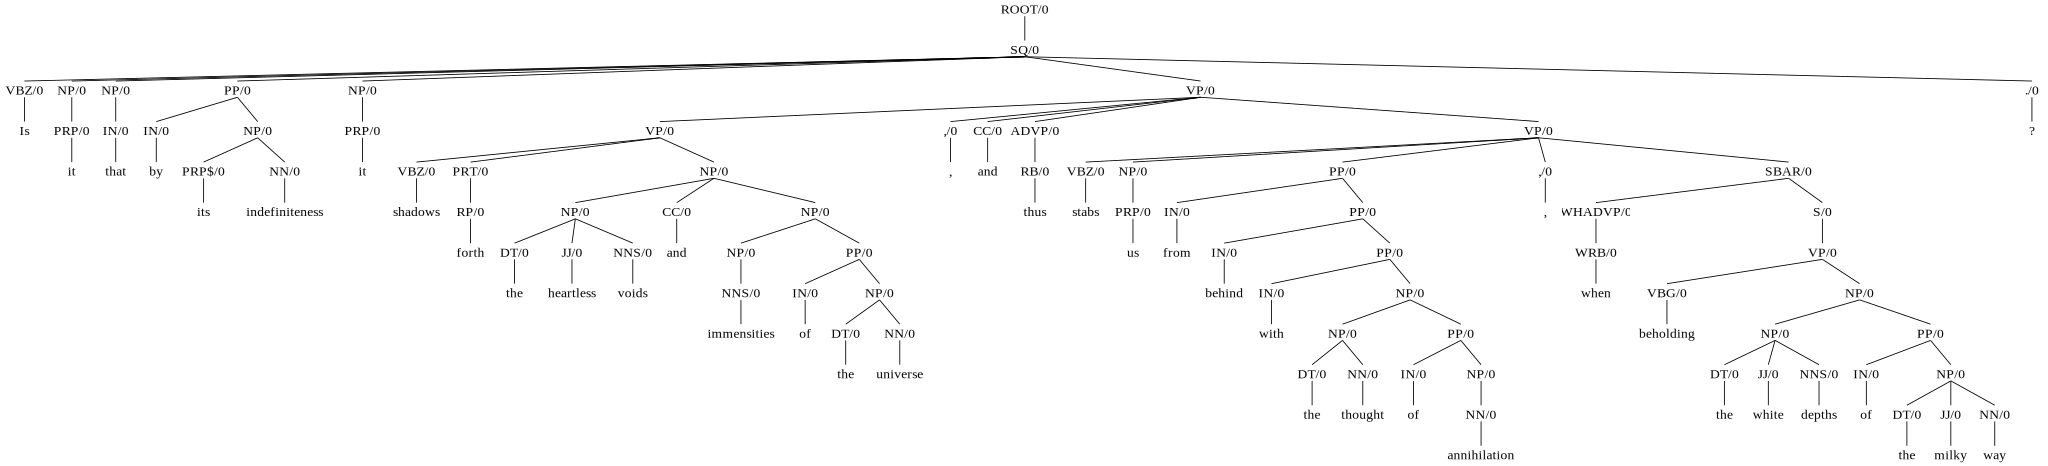

In [12]:
text.sent(1).mtree()

In [13]:
text.parse()

Metrically parsing line units:   0%|          | 0/14 [00:00<?, ?it/s]

 Is <u><b>it</b></u> that by <font style="color:darkred"><u>its</u></font> in<u><b>de</b></u>fi<font style="color:darkred"><u>ni</u></font>teness <font style="color:darkred">it</font> <u><b>sha</b></u><u><b>dows</b></u> <font style="color:darkred"><b>forth</b></font>

 the <u><b>hear</b></u>tless <u><b>voids</b></u> and <font style="color:darkred">im</font><u><b>men</b></u>si<font style="color:darkred"><u>ties</u></font> of the <u><b>u</b></u>ni<u><b>verse</b></u>,

 and <u><b>thus</b></u>

 <u><b>stabs</b></u> us <font style="color:darkred"><u>from</u></font> be<u><b>hind</b></u> with the <u><b>thought</b></u> of <font style="color:darkred">an</font><u><b>ni</b></u>hi<u><b>la</b></u>tion,

 <u><b>when</b></u> be<u><b>hol</b></u>ding <font style="color:darkred">the</font> <u><b>white</b></u> <font style="color:darkred"><u><b>depths</b></u></font> of the <u><b>mil</b></u>ky <u><b>way</b></u>?

 Or <u><b>is</b></u> it,

 <u><b>that</b></u> as in <u><b>es</b></u>sence <u><b>whi</b></u>teness <u><b>is</b></u> not so

 much a <u><b>co</b></u>lour <font style="color:darkred"><u>as</u></font> the <u><b>vi</b></u>si<font style="color:darkred">ble</font> <u><b>a</b></u>bsence <font style="color:darkred">of</font> <u><b>co</b></u>lour;

 and <u><b>at</b></u> the <u><b>same</b></u> <font style="color:darkred"><u><b>time</b></u></font> the <u><b>con</b></u>crete <font style="color:darkred"><u>of</u></font> all <u><b>co</b></u>lours;

 is <u><b>it</b></u> for these <u><b>rea</b></u>sons <u><b>that</b></u> there <u><b>is</b></u> such a <u><b>dumb</b></u> <font style="color:darkred"><u><b>blan</b></u></font>kness,

 <u><b>full</b></u> of <u><b>mea</b></u>ning,

 in a <u><b>wide</b></u> <font style="color:darkred"><b>lands</b></font><u><b>cape</b></u> of <u><b>snows</b></u>:

 a <u><b>co</b></u>lour<font style="color:darkred">less</font>,

 all- <u><b>co</b></u>lour <font style="color:darkred"><u>of</u></font> at<u><b>he</b></u>ism <font style="color:darkred">from</font> <u><b>which</b></u> we <u><b>shrink</b></u>?

*total  ...  word_nsyll
para_i unit_i parse_rank is_troch parse_i parse          parse_str                                         sent_i sentpart_i line_i combo_i slot_i slot_meter syll_str_parse word_i word_str word_tok word_ipa_i word_ipa syll_i syll_str syll_ipa syll_stress syll_weight          ...            
1      1      1          0        1       wSwwSwSwSwwSSw ùñ®ùóå ùó∂ùòÅ ùóçùóÅùñ∫ùóç ùñªùóí ùôûùô©ùô® ùóÇùóáùó±ùó≤ùñøùóÇùô£ùôûùóçùñæùóáùñæùóåùóå ùò™ùòµ ùòÄùóµùóÆùó±ùóºùòÑùòÄ ùòßùò∞ùò≥ùòµùò© 1      1          1      12      1      w          ùñ®ùóå             1      Is       is       2          …™z       1      Is       …™z       U           H               0.0  ...           1
                                                                                                                                            2      s          ùó∂ùòÅ             2       it      it       1          '…™t      1      it       '…™t      P           H               0.0  ...           1
                                                                                                                                            3      w          ùóçùóÅùñ∫ùóç           3       that    that     2          √∞…ôt      1      that     √∞…ôt      U           H               0.0  ...           1
                                                                                                                                            4      w          ùñªùóí             4       by      by       1          ba…™      1      by       ba…™      U           H               0.0  ...           1
                                                                                                                                            5      s          ùôûùô©ùô®            5       its     its      1          …™ts      1      its      …™ts      U           H               1.0  ...           1
...                                                                                                                                                                                                                                                                            ...  ...         ...
       14     8          0        8       wSwwSwSwwSwS   ùñ∫ùóÖùóÖ- ùó∞ùóºùóÖùóàùóéùóã ùò∞ùòß ùóÆùòÅùóÅùñæùó∂ùóåùóÜ ùòßùò≥ùò∞ùòÆ ùòÑùóµùó∂ùó∞ùóµ ùóêùñæ ùòÄùóµùóøùó∂ùóªùó∏?      2      11         6      14      10     w          ùòßùò≥ùò∞ùòÆ           66      from    from     1          fr åm     1      from     fr åm     U           H               1.0  ...           1
                                                                                                                                            11     s          ùòÑùóµùó∂ùó∞ùóµ          67      which   which    1          'w…™ ß     1      which    'w…™ ß     P           H               0.0  ...           1
                                                                                                                                            12     w          ùóêùñæ             68      we      we       2          wiÀê      1      we       wiÀê      U           L               0.0  ...           1
                                                                                                                                            13     s          ùòÄùóµùóøùó∂ùóªùó∏         69      shrink  shrink   1          ' Ér…™≈ãk   1      shrink   ' Ér…™≈ãk   P           H               0.0  ...           1
                                                                                                                                            14     NaN        ?              70     ?                 0                   0      ?                 NaN         NaN             0.0  ...           0

[1241 rows x 35 columns]